# Introduction to DBnomics in Python

This tutorial will guide through the process of writing visualizations of DBnomics time series.
We will explain how to obtain the data, and how to create the chart.

In [1]:
import pandas as pd
import altair as alt

from dbnomics import fetch_series, fetch_series_by_codes, fetch_series_by_dimensions, fetch_series_by_url

Note: in this notebook we follow the conventions of the Scientific Python community. In particular, we use the `df` shortcut for `DataFrame`.

# Search by series codes: one series

Fetch one series from the dataset "Unemployment rate" [ZUTN] of the AMECO provider:

In [2]:
df1 = fetch_series_by_codes(
    provider_code='AMECO',
    dataset_code='ZUTN',
    series_codes=['EA19.1.0.0.0.ZUTN'],
)

The `fetch_series_by_codes` belongs to the `dbnomics` Python package.

Data is returned as a [Pandas](http://pandas.pydata.org/) [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe), which is very often used in the Python scientific community.

Let's display the first rows of the `DataFrame` by using the `head` method, each row representing an observation of the time series:

In [3]:
df1.head()

,Country,Frequency,Unit,code,freq,geo,name,period,unit,value,dataset_code,dataset_name
0,Euro area,Annually,(Percentage of active population),EA19.1.0.0.0.ZUTN,a,ea19,Euro area,1960,percentage-of-active-population,NA,ZUTN,Unemployment rate: total :- Member States: def...
1,Euro area,Annually,(Percentage of active population),EA19.1.0.0.0.ZUTN,a,ea19,Euro area,1961,percentage-of-active-population,NA,ZUTN,Unemployment rate: total :- Member States: def...
2,Euro area,Annually,(Percentage of active population),EA19.1.0.0.0.ZUTN,a,ea19,Euro area,1962,percentage-of-active-population,NA,ZUTN,Unemployment rate: total :- Member States: def...
3,Euro area,Annually,(Percentage of active population),EA19.1.0.0.0.ZUTN,a,ea19,Euro area,1963,percentage-of-active-population,NA,ZUTN,Unemployment rate: total :- Member States: def...
4,Euro area,Annually,(Percentage of active population),EA19.1.0.0.0.ZUTN,a,ea19,Euro area,1964,percentage-of-active-population,NA,ZUTN,Unemployment rate: total :- Member States: def...


Check that we downloaded 1 series, as asked:

In [4]:
df1.code.nunique()

1

To plot the `DataFrame`, we need to clean the missing values, represented by `NA` in the "value" column.
Some series use the `None` value to represent not available values, so let's filter them too.

Note: DBnomics will define a standard `NA` value for missing values quite soon.

Also, we need to convert the "value" column to `float`.

In [5]:
def prepare_dataframe(df):
    clean_df = df.query("value != 'NA'").query("value != 'None'")
    clean_df.value = pd.to_numeric(clean_df.value)
    return clean_df

In [6]:
df1_clean = prepare_dataframe(df1)
df1_clean.head()

,Country,Frequency,Unit,code,freq,geo,name,period,unit,value,dataset_code,dataset_name
38,Euro area,Annually,(Percentage of active population),EA19.1.0.0.0.ZUTN,a,ea19,Euro area,1998,percentage-of-active-population,10.4,ZUTN,Unemployment rate: total :- Member States: def...
39,Euro area,Annually,(Percentage of active population),EA19.1.0.0.0.ZUTN,a,ea19,Euro area,1999,percentage-of-active-population,9.7,ZUTN,Unemployment rate: total :- Member States: def...
40,Euro area,Annually,(Percentage of active population),EA19.1.0.0.0.ZUTN,a,ea19,Euro area,2000,percentage-of-active-population,8.9,ZUTN,Unemployment rate: total :- Member States: def...
41,Euro area,Annually,(Percentage of active population),EA19.1.0.0.0.ZUTN,a,ea19,Euro area,2001,percentage-of-active-population,8.3,ZUTN,Unemployment rate: total :- Member States: def...
42,Euro area,Annually,(Percentage of active population),EA19.1.0.0.0.ZUTN,a,ea19,Euro area,2002,percentage-of-active-population,8.6,ZUTN,Unemployment rate: total :- Member States: def...


We use the [Altair](https://altair-viz.github.io/) library to render charts, but you can use any other one like matplotlib, bqplot, plotly, etc.

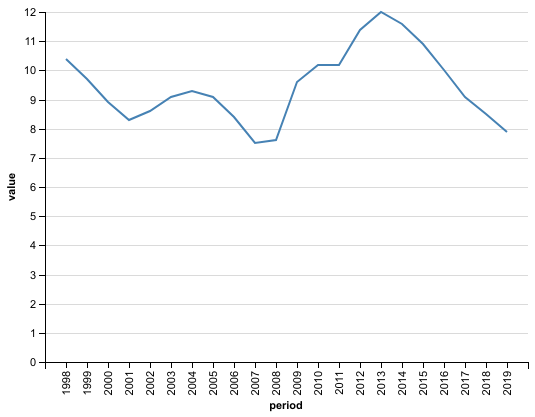

In [7]:
chart = alt.Chart(df1_clean).mark_line().encode(
    x='period',
    y='value',
)
chart

# Search by series codes: two series

Fetch two series from the dataset "Unemployment rate" [ZUTN] of the AMECO provider, and display the first observations:

In [8]:
df2 = fetch_series_by_codes(
    provider_code='AMECO',
    dataset_code='ZUTN',
    series_codes=['EA19.1.0.0.0.ZUTN', 'DNK.1.0.0.0.ZUTN'],
)
df2.head()

,Country,Frequency,Unit,code,freq,geo,name,period,unit,value,dataset_code,dataset_name
0,Euro area,Annually,(Percentage of active population),EA19.1.0.0.0.ZUTN,a,ea19,Euro area,1960,percentage-of-active-population,NA,ZUTN,Unemployment rate: total :- Member States: def...
1,Euro area,Annually,(Percentage of active population),EA19.1.0.0.0.ZUTN,a,ea19,Euro area,1961,percentage-of-active-population,NA,ZUTN,Unemployment rate: total :- Member States: def...
2,Euro area,Annually,(Percentage of active population),EA19.1.0.0.0.ZUTN,a,ea19,Euro area,1962,percentage-of-active-population,NA,ZUTN,Unemployment rate: total :- Member States: def...
3,Euro area,Annually,(Percentage of active population),EA19.1.0.0.0.ZUTN,a,ea19,Euro area,1963,percentage-of-active-population,NA,ZUTN,Unemployment rate: total :- Member States: def...
4,Euro area,Annually,(Percentage of active population),EA19.1.0.0.0.ZUTN,a,ea19,Euro area,1964,percentage-of-active-population,NA,ZUTN,Unemployment rate: total :- Member States: def...


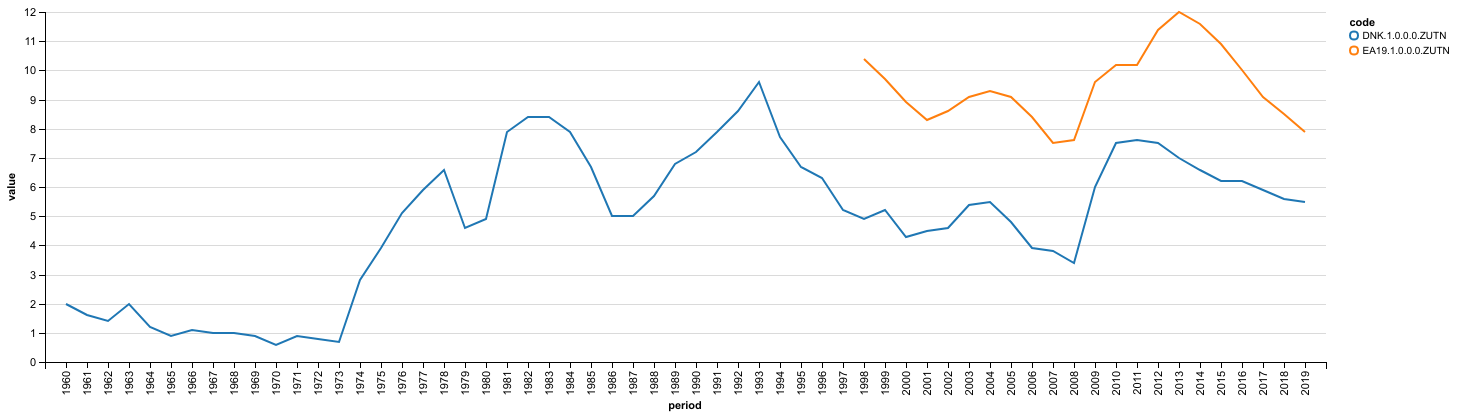

In [9]:
chart = alt.Chart(prepare_dataframe(df2)).mark_line().encode(
    x='period',
    y='value',
    color='code',
)
chart

## Search by dimensions

Fetch many series from the dataset "Doing Business" [DB] of the World Bank provider, searching for time series about France, Italy and Spain, and selecting the indicator "Procedures required to start a business - Women (number)":

In [10]:
df3 = fetch_series_by_dimensions(
    provider_code="world-bank",
    dataset_code="DB",
    dimensions={
        "country": ["FR", "IT", "ES"],
        "indicator": ["IC.REG.PROC.WOMEN"],
    },
)
df3

,code,country,indicator,period,value,dataset_code,dataset_name
0,IC.REG.PROC.WOMEN-FR,FR,IC.REG.PROC.WOMEN,2005,5,DB,Doing Business
1,IC.REG.PROC.WOMEN-FR,FR,IC.REG.PROC.WOMEN,2006,5,DB,Doing Business
2,IC.REG.PROC.WOMEN-FR,FR,IC.REG.PROC.WOMEN,2007,5,DB,Doing Business
3,IC.REG.PROC.WOMEN-FR,FR,IC.REG.PROC.WOMEN,2008,5,DB,Doing Business
4,IC.REG.PROC.WOMEN-FR,FR,IC.REG.PROC.WOMEN,2009,5,DB,Doing Business
5,IC.REG.PROC.WOMEN-FR,FR,IC.REG.PROC.WOMEN,2010,5,DB,Doing Business
6,IC.REG.PROC.WOMEN-FR,FR,IC.REG.PROC.WOMEN,2011,5,DB,Doing Business
7,IC.REG.PROC.WOMEN-FR,FR,IC.REG.PROC.WOMEN,2012,5,DB,Doing Business
8,IC.REG.PROC.WOMEN-FR,FR,IC.REG.PROC.WOMEN,2013,5,DB,Doing Business
9,IC.REG.PROC.WOMEN-FR,FR,IC.REG.PROC.WOMEN,2014,5,DB,Doing Business


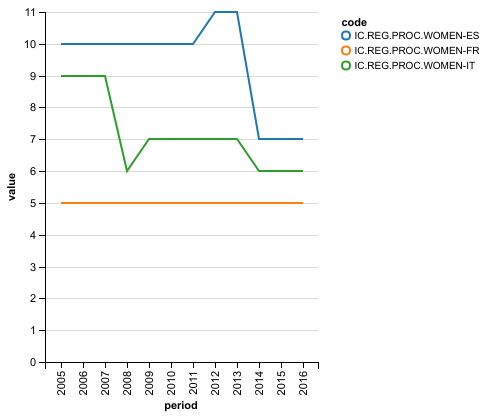

In [11]:
chart = alt.Chart(prepare_dataframe(df3)).mark_line().encode(
    x='period',
    y='value',
    color='code',
)
chart

You may ask yourself "How do I find those dimensions?". Well, there's a simpler way:
- just use the DBnomics website, going to the [Doing Business dataset page](https://next.nomics.world/world-bank/DB),
- select some dimensions by clicking in the menus of the left column,
- copy-paste the "API link" URL which is at the right of the "reset filters" button, as an argument of the `fetch_series_by_url` function.

In [12]:
df4 = fetch_series_by_url("https://api.next.nomics.world/world-bank/DB?dimensions=%7B%22country%22%3A%5B%22FR%22%2C%22IT%22%2C%22ES%22%5D%2C%22indicator%22%3A%5B%22IC.REG.PROC.WOMEN%22%5D%7D")
df4.head()

,code,country,indicator,period,value,dataset_code,dataset_name
0,IC.REG.PROC.WOMEN-FR,FR,IC.REG.PROC.WOMEN,2005,5,DB,Doing Business
1,IC.REG.PROC.WOMEN-FR,FR,IC.REG.PROC.WOMEN,2006,5,DB,Doing Business
2,IC.REG.PROC.WOMEN-FR,FR,IC.REG.PROC.WOMEN,2007,5,DB,Doing Business
3,IC.REG.PROC.WOMEN-FR,FR,IC.REG.PROC.WOMEN,2008,5,DB,Doing Business
4,IC.REG.PROC.WOMEN-FR,FR,IC.REG.PROC.WOMEN,2009,5,DB,Doing Business


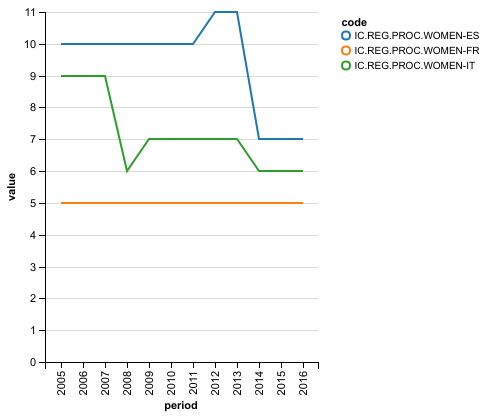

In [13]:
chart = alt.Chart(prepare_dataframe(df4)).mark_line().encode(
    x='period',
    y='value',
    color='code',
)
chart

The chart is exactly the same than the previous one, generated by the `fetch_series_by_dimensions` function.